# This Notebook analyzes the popularity of different categories of games by the proportion of ratings which the categories got

## Setup



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import seaborn as sns
import scipy
from math import sqrt
from math import asin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/CSS_Lab/Data/collective_data/'

# Data Preparation 

### Read and prepare data about games

In [ ]:
games = pd.read_csv(data_path + 'categories_transformed.csv', sep ='\t', encoding='utf-8')
games.drop(['Unnamed: 0'], axis=1, inplace=True)
games.head(10)

,name,id,Adventure,Exploration,Fantasy,Fighting,Miniatures,Environmental,Medical,Economic,Industry / Manufacturing,Trains,Transportation,Science Fiction,Space Exploration,Territory Building,Civilization,Negotiation,Political,Card Game,Civil War,Movies / TV / Radio theme,Wargame,Modern Warfare,American West,Animals,Age of Reason,Mythology,Novel-based,Dice,Medieval,Ancient,City Building,Nautical,Post-Napoleonic,Educational,Puzzle,Collectible Components,Horror,Farming,...,Pirates,Mature / Adult,Comic Book / Strip,Video Game Theme,Abstract Strategy,Renaissance,Bluffing,Spies/Secret Agents,Action / Dexterity,Arabian,Prehistoric,Deduction,Party Game,Word Game,Murder/Mystery,Aviation / Flight,Zombies,World War II,World War I,Racing,Real-time,Pike and Shot,Humor,Sports,Electronic,Maze,Print & Play,Mafia,Expansion for Base-game,American Indian Wars,American Revolutionary War,Napoleonic,Childrens Game,Memory,American Civil War,Vietnam War,Math,Number,Trivia,nan
0,Gloomhaven,174430,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1,Pandemic Legacy: Season 1,161936,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
2,Brass: Birmingham,224517,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
3,Terraforming Mars,167791,No,Yes,No,No,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
4,Twilight Imperium: Fourth Edition,233078,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
5,Gloomhaven: Jaws of the Lion,291457,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
6,Through the Ages: A New Story of Civilization,182028,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
7,Gaia Project,220308,No,Yes,No,No,No,No,No,Yes,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
8,Star Wars: Rebellion,187645,No,No,No,Yes,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
9,Twilight Struggle,12333,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


### Read and prepare data about ratings

In [ ]:
def group_into_continents(country):
  undefined = {'Undefined'}
  north_america = {'UnitedStates', 'Canada'}
  europe = {'Sweden', 'Germany', 'Spain', 'Italy', 'Luxembourg', 
              'UnitedKingdom', 'Poland', 'Belgium', 'Austria', 'Belarus', 
              'BosniaandHerzegovina', 'Bulgaria', 'Croatia', 'CzechRepublic', 
              'Denmark', 'England', 'Estonia', 'FaroeIslands', 'Switzerland',
              'Norway', 'Portugal', 'Greece', 'Russia', 'Hungary', 'Finland',
              'Netherlands', 'France', 'Bulgaria', 'Scotland', 'Ukraine',
              'Ireland', 'Latvia', 'Slovakia', 'Estonia', 'Lithuania', 
              'Bulgaria','Croatia','Serbia','Slovenia', 'Wales', 'Andorra', 
              'Turkey', 'Malta', 'Cyprus', 'Romania', 'Iceland', 'Moldova', 
              'Georgia', 'Greenland', 'IsleofMan', 'Macedonia', 'Monaco', 
              'Montenegro', 'Other-EasternEurope', 'VaticanCity', 'Albania', 
              'SanMarino'}

  if country in north_america:
    return 'NorthAmerica'
  elif country in europe:
    return 'Europe'
  elif country in undefined:
    return 'Undefined' # no location given
  else:
    return 'Other' # some other location 

In [ ]:
ratings = pd.read_csv(data_path + 'all_ratings_unprocessed.csv', sep ='\t', encoding = 'utf-8')

In [ ]:
ratings['id'] = ratings['file'].apply(lambda x: x.split('_')[1])
ratings.drop(['Unnamed: 0'], inplace = True,axis=1)
ratings['Location'].fillna('Undefined', inplace=True)
#ratings['Rating'].fillna('-0.00001', inplace=True)
# remove entries where no numerical rating has been given
ratings.dropna(subset = ['Rating'], inplace=True)
ratings['Country'] = ratings['Location'].apply(lambda x: x if not '·' in x else x.split('·')[1])
ratings['Rating'] = pd.to_numeric(ratings['Rating'], downcast="float")
ratings['Continent'] = ratings['Country'].apply(group_into_continents)

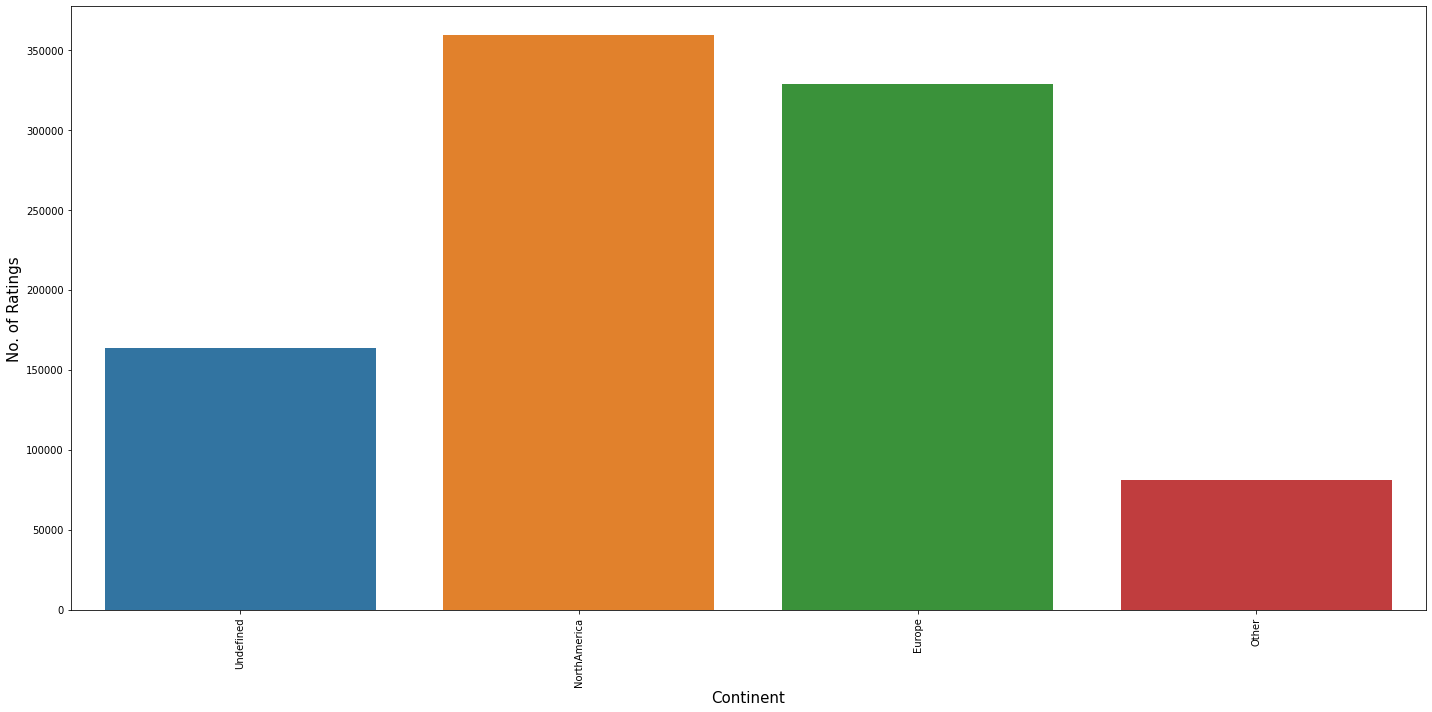

In [ ]:
plt.figure(figsize=(20,10))

sns.countplot(x='Continent', 
            data=ratings)

plt.xlabel("Continent", size=15)
plt.ylabel("No. of Ratings", size=15)
# plt.title("Rating Distribution across Continents", size=18)
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
# a list of the top 40 categories by number of ratings
top_40_categories = ['Card Game','Fantasy','Economic','Fighting','Science Fiction','Exploration',
            'Adventure','Wargame','Medieval','City Building','Miniatures','Dice', 'Deduction', 
            'Territory Building', 'Ancient', 'Bluffing', 'Animals', 'Civilization', 'Nautical', 
            'Industry / Manufacturing', 'Horror', 'Political', 'Novel-based', 'Abstract Strategy', 
            'Negotiation', 'Party Game', 'Renaissance', 'Mythology', 'Movies / TV / Radio theme', 
            'Farming', 'Transportation', 'Space Exploration', 'Puzzle', 'Real-time', 'Trains', 
            'World War I', 'World War II', 'Humor', 'Napoleonic', 'Environmental']

# a list of the top 20 categories by number of ratings
top_20_categories = top_40_categories[:20]

# Data Analysis

### Calculate relative frequencies of categories for all countries

In [ ]:
# collect in a dictionary all games related to a particular category
categorised_games = collections.OrderedDict()
for category in top_20_categories:
  categorised_games[category] = games[games[category] == 'Yes']['name']

# collect in a dictionary all ratings related to a particular category
categorised_ratings = collections.OrderedDict()
for category in categorised_games.keys():
  categorised_ratings[category] = ratings.loc[ratings['Game_name'].isin(categorised_games[category])]['Rating'].values

# collect in a dictionary the number of ratings per category
categorised_number_of_ratings = collections.OrderedDict()
for category in categorised_ratings.keys():
  categorised_number_of_ratings[category] = len(categorised_ratings[category])

In [ ]:
# total number of ratings
num_all_ratings = len(ratings)

# collect in a dictionary the relative frequency of categories
categorised_rel_freq = collections.OrderedDict()
for category in categorised_ratings.keys():
  categorised_rel_freq[category] = round(len(categorised_ratings[category]) / num_all_ratings, 2)

### Calculate relative frequencies of categories for European countries

In [ ]:
# collect in a dictionary all ratings from European users related to a particular category 
categorised_ratings_EU = collections.OrderedDict()
for category in categorised_games.keys():
  categorised_ratings_EU[category] = ratings.loc[(ratings['Game_name'].isin(categorised_games[category])) \
                                                 & (ratings['Continent'] == 'Europe')]['Rating'].values

In [ ]:
# collect in a dictionary the number of ratings per category by european users
categorised_number_of_ratings_EU = collections.OrderedDict()
for category in categorised_ratings_EU.keys():
  categorised_number_of_ratings_EU[category] = len(categorised_ratings_EU[category])

In [ ]:
# total number of ratings by European users
all_ratings_EU = len(ratings.loc[(ratings['Continent'] == 'Europe')])

# collect in a dictionary the relative frequency of categories for EU countries
categorised_rel_freq_EU = collections.OrderedDict()
for category in categorised_ratings_EU.keys():
  categorised_rel_freq_EU[category] = round(len(categorised_ratings_EU[category]) / all_ratings_EU, 2)

### Calculate relative frequencies of categories for North American countries

In [ ]:
# collect in a dictionary all ratings from North American users related to a particular category 
categorised_ratings_NA = collections.OrderedDict()
for category in categorised_games.keys():
  categorised_ratings_NA[category] = ratings.loc[(ratings['Game_name'].isin(categorised_games[category])) \
                                                 & (ratings['Continent'] == 'NorthAmerica')]['Rating'].values

In [ ]:
# collect in a dictionary the number of ratings per category by North American users
categorised_number_of_ratings_NA = collections.OrderedDict()
for category in categorised_ratings_NA.keys():
  categorised_number_of_ratings_NA[category] = len(categorised_ratings_NA[category])

In [ ]:
# total number of ratings by North American users
all_ratings_NA = len(ratings.loc[(ratings['Continent'] == 'NorthAmerica')])

# collect in a dictionary the relative frequency of categories for North America
categorised_rel_freq_NA = collections.OrderedDict()
for category in categorised_ratings_NA.keys():
  categorised_rel_freq_NA[category] = round(len(categorised_ratings_NA[category]) / all_ratings_NA, 2)

# Results

In [ ]:
def calculate_z_score(prop_1, prop_2, total_1, total_2):
  pooled_dist = (total_1 * prop_1 + total_2 * prop_2) / (total_1 + total_2) 
  return (prop_1 - prop_2) / sqrt((pooled_dist * (1 - pooled_dist)) * (1/total_1 + 1/total_2))

In [ ]:
def calculate_cohen_h(prop_1, prop_2):
  return abs(2 * asin(sqrt(prop_1)) - 2 * asin(sqrt(prop_2)))

In [ ]:
# store relative frequencies, z-scores, p-values and effect sizes in a common data structure
results = []
for category in top_20_categories:
  rel_freq_EU = categorised_rel_freq_EU[category]
  rel_freq_NA = categorised_rel_freq_NA[category]
  z_score = calculate_z_score(rel_freq_EU, rel_freq_NA, categorised_number_of_ratings_EU[category], categorised_number_of_ratings_NA[category])
  p_value = scipy.stats.norm.sf(abs(z_score))*2
  cohen_h = calculate_cohen_h(rel_freq_EU, rel_freq_NA)
  results.append([rel_freq_EU, rel_freq_NA, z_score, p_value, cohen_h])

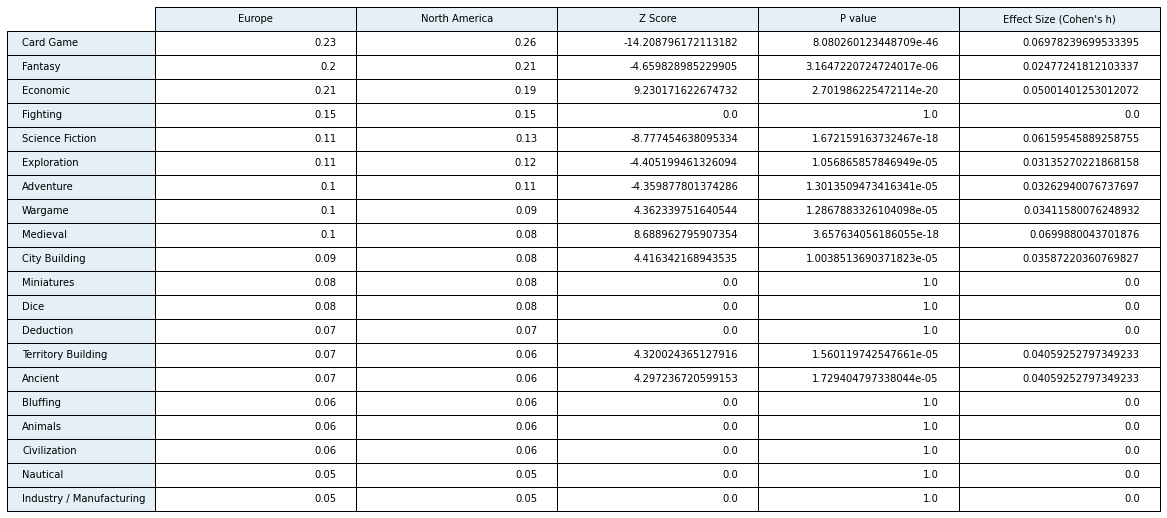

In [ ]:
# plot a table for comparison

column_labels = ["Europe", "North America", "Z Score", "P value", "Effect Size (Cohen's h)"]
df = pd.DataFrame(results, columns=column_labels)
rcolors = plt.cm.BuPu(np.full(len(top_20_categories), 0.1))
ccolors = plt.cm.BuPu(np.full(len(df.columns), 0.1))

# create the table
freq_table = plt.table(cellText=df.values,
          rowLabels=top_20_categories,
          rowColours=rcolors,
          colLabels=df.columns, 
          colColours=ccolors,
          loc='center')

# hide x and y axes of associated bar graph
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# hide axis border
plt.box(on=None)

freq_table.scale(3, 2)

# add a title
#plt.title("Popularity of top 40 categories")

plt.show()